# Lab 4

# import libs and connect to database

In [1]:
import pandas
import configparser
import psycopg2

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

host = config['myaws']['host']
db = config['myaws']['db']
user = config['myaws']['user']
pwd = config['myaws']['pwd']

In [3]:
conn = psycopg2.connect(
                        host = host,
                        user = user,
                        password = pwd,
                        dbname = db
                        )

In [4]:
cur=conn.cursor()

# q1

In [5]:
sql_q1 = """
            select * from gp12.student
            """

In [6]:
df = pandas.read_sql_query(sql_q1,conn)
df[:]

,s_email,s_name,major
0,shawwc@dukes.jmu.edu,will shaw,intelligence analysis
1,saclolcr@dukes.jmu.edu,christopher saclolo,intelligence analysis
2,menjivax@dukes.jmu.edu,adriana menjivar,intelligence analysis
3,mckeowdj@dukes.jmu.edu,declan mckeown,intelligence analysis
4,s1@jmu.edu,s1,intelligence analysis


# q2

In [11]:
sql_q2 = """
        select gp12.professor.p_name,
        gp12.course.c_name
        from gp12.professor
        inner join gp12.course
        on gp12.professor.p_email = gp12.course.p_email
        
        """

In [12]:
df = pandas.read_sql_query(sql_q2,conn)
df[:]

,p_name,c_name
0,michael schoenbeck,leading small organizations
1,noel hendrickson,counterfactual reasoning
2,matthew lovesky,personal wellness\n
3,John Smith,biology
4,new_p,new_c_name
5,new_p,data mining\n


# q3

In [13]:
sql_q3 = """
        select c_number,
        count(c_number) as enrolled
        from gp12.enroll_list
        group by c_number
        order by enrolled desc
        """

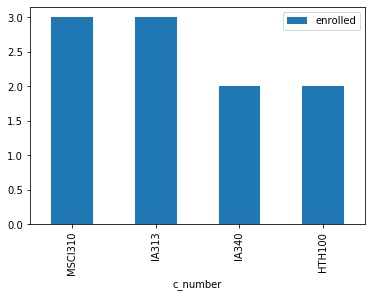

In [15]:
df = pandas.read_sql_query(sql_q3,conn)
df.plot.bar(y= 'enrolled', x= 'c_number')

# q4

In [16]:
sql_q4 = """
        select gp12.professor.p_name,
        count(gp12.course.c_name) as teaching_number
        from gp12.professor
        inner join gp12.course
        on gp12.professor.p_email = gp12.course.p_email
        group by professor.p_name
        order by teaching_number desc
        """

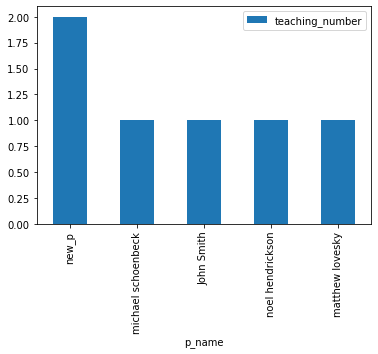

In [17]:
df = pandas.read_sql_query(sql_q4,conn)
df.plot.bar(y='teaching_number', x='p_name')

# q5

In [18]:
sql_q5_professor = """
                    insert into gp12.professor(p_email,p_name, office)
                    values('{}','{}','{}')
                    """.format('chadblack@jmu.edu', 'chad_black','ISAT_123')

In [19]:
cur.execute(sql_q5_professor)

In [20]:
conn.commit()

In [21]:
df=pandas.read_sql_query('select * from gp12.professor',conn)

df[:]

,p_email,p_name,office
0,hendrinx@jmu.edu,noel hendrickson,None
1,loveskms@jmu.edu,matthew lovesky,hbs3064
2,schoe2mt@jmu.edu,michael schoenbeck,None
3,new_p@jmu.edu,new_p,new_office
4,new_professor@jmu.edu,new_professor,new_office_number
5,JohnSmith@jmu.edu,John Smith,ISAT 150
6,chadblack@jmu.edu,chad_black,ISAT_123


In [25]:
sql_q5_course = """
                    insert into gp12.course(c_number,c_name,room,p_email)
                    values('{}','{}','{}','{}')
                    """.format('ia_new','new_c_name','online','chadblack@jmu.edu')

In [29]:
cur.execute(sql_q5_course)

IntegrityError: duplicate key value violates unique constraint "course_pkey"
DETAIL:  Key (c_number)=(ia_new) already exists.


In [27]:
conn.commit()

In [28]:
df=pandas.read_sql_query('select * from gp12.course', conn)
df[:]

,c_number,c_name,room,p_email
0,MSCI310,leading small organizations,online,schoe2mt@jmu.edu
1,IA313,counterfactual reasoning,online,hendrinx@jmu.edu
2,HTH100,personal wellness\n,online,loveskms@jmu.edu
3,BIO 150,biology,online,JohnSmith@jmu.edu
4,ia_new,new_c_name,online,new_p@jmu.edu
5,IA340,data mining\n,online,new_p@jmu.edu


# q6

In [32]:
sql_q6_course = """
                update gp12.course
                set p_email = '{}'
                where p_email = '{}'
                """.format('new_p@jmu.edu','weixx@jmu.edu')

In [33]:
cur.execute(sql_q6_course)

InternalError: current transaction is aborted, commands ignored until end of transaction block


In [34]:
#cur.execute('ROLLBACK')

In [35]:
conn.commit()

In [37]:
df=pandas.read_sql_query('select * from gp12.course',conn)
df[:]

,c_number,c_name,room,p_email
0,MSCI310,leading small organizations,online,schoe2mt@jmu.edu
1,IA313,counterfactual reasoning,online,hendrinx@jmu.edu
2,HTH100,personal wellness\n,online,loveskms@jmu.edu
3,BIO 150,biology,online,JohnSmith@jmu.edu
4,ia_new,new_c_name,online,new_p@jmu.edu
5,IA340,data mining\n,online,new_p@jmu.edu


In [38]:
sql_q6_professor = """
                delete from gp12.professor
                where p_email = '{}'
                """.format('weixx@jmu.edu')

In [39]:
cur.execute(sql_q6_professor)

In [40]:
conn.commit()

In [41]:
df=pandas.read_sql_query('select * from gp12.professor',conn)
df[:]

,p_email,p_name,office
0,hendrinx@jmu.edu,noel hendrickson,None
1,loveskms@jmu.edu,matthew lovesky,hbs3064
2,schoe2mt@jmu.edu,michael schoenbeck,None
3,new_p@jmu.edu,new_p,new_office
4,new_professor@jmu.edu,new_professor,new_office_number
5,JohnSmith@jmu.edu,John Smith,ISAT 150
6,chadblack@jmu.edu,chad_black,ISAT_123


# close connection

In [42]:
cur.close()
conn.close()